In [2]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
# =============================================================================
# Read Data
# =============================================================================
batch_size = 64                                                                                                                                                 

train_dataset = datasets.MNIST(root='./mnist_data/',train=True,transform=transforms.ToTensor(),download=True)

test_dataset = datasets.MNIST(root='./mnist_data/',train=False,transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=False)

In [15]:
# =============================================================================
# Define Model
# =============================================================================
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 5, kernel_size=2)#28*28->24*24
        self.conv2 = nn.Conv2d(5, 10, kernel_size=2)#12*12->10*10
        self.conv3 = nn.Conv2d(10, 20, kernel_size=2)#5*5->3*3
        self.mp = nn.MaxPool2d(2)
        self.lc=nn.Linear(80,40)
        self.fc = nn.Linear(40, 10)
    def forward(self, x):
        in_size = x.size(0)
#        print(in_size)
        x = F.relu(self.mp(self.conv1(x)))
        x = F.relu(self.mp(self.conv2(x)))
        x = F.relu(self.mp(self.conv3(x)))
        x = x.view(in_size, -1)
        x=self.lc(x)
        return F.log_softmax(self.fc(x))

/home/dominic/yes/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Train Epoch: 1 Loss:2.2573702335357666
Train Epoch: 2 Loss:0.5572424530982971
Train Epoch: 3 Loss:0.2829728424549103
Train Epoch: 4 Loss:0.46327152848243713
Train Epoch: 5 Loss:0.14687491953372955
Train Epoch: 6 Loss:0.20426321029663086
Train Epoch: 7 Loss:0.010334312915802002
Train Epoch: 8 Loss:0.07565724849700928
Train Epoch: 9 Loss:0.11093652248382568


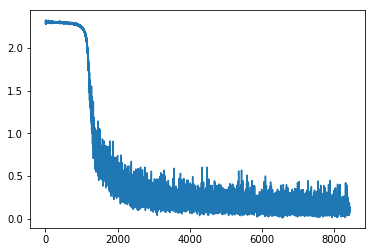

In [16]:
model = Model()
#criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
arLoss=[]
for epoch in range(1, 10):
    model.train()
    for index, (x, y) in enumerate(train_loader):
        x, y = Variable(x), Variable(y)
        y_pred = model(x)
        loss = F.nll_loss(y_pred, y)
        arLoss.append(loss)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print('Train Epoch: {} Loss:{}'.format(epoch, loss.data))
plt.plot(arLoss)